In [6]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [12]:
data = pd.read_csv('/content/ETH-USD.csv',index_col = "Date", parse_dates = True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-11,1268.089966,1337.300049,1135.170044,1154.930054,1154.930054,7235899904
2018-01-12,1158.290039,1296.040039,1120.089966,1273.199951,1273.199951,5222300160
2018-01-13,1270.469971,1432.880005,1270.469971,1396.420044,1396.420044,5746760192
2018-01-14,1397.479980,1400.560059,1286.209961,1366.770020,1366.770020,4841630208
2018-01-15,1365.209961,1390.589966,1290.599976,1291.920044,1291.920044,4781100032
...,...,...,...,...,...,...
2023-01-07,1269.419800,1270.598267,1262.271118,1264.270386,1264.270386,2565213548
2023-01-08,1264.181885,1287.359497,1260.226807,1287.359497,1287.359497,3495088905
2023-01-09,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824


In [26]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2* len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00


In [27]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14127.185, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14176.113, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14145.842, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14152.397, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14174.309, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14126.998, Time=1.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14129.866, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14125.073, Time=1.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14131.929, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14130.634, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14123.306, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14150.649, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14144.100, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14130.134, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [36]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


# Create an array of 100 consecutive integers starting from last_index
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Predict the closing prices for the next 100 days
y_next_100_days = model.predict(n_periods=len(x_next_100_days))

# Print the predicted closing prices for the next 100 days
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 30 days:
[2129.1386132  2137.61155569 2130.79134721 2136.28120434 2131.86219993
 2135.41923238 2132.55603545 2134.86073656 2133.00559095 2134.49887146
 2133.29687057 2134.2644089  2133.48559881 2134.11249404 2133.60788113
 2134.01406413 2133.68711127 2133.95028864 2133.73844671 2133.9089667
 2133.77170838 2133.88219306 2133.79325954 2133.86484567 2133.80722315
 2133.85360581 2133.81627056 2133.84632319 2133.82213263 2133.84160457]
Predicted closing prices for the next 100 days:
[2129.1386132  2137.61155569 2130.79134721 2136.28120434 2131.86219993
 2135.41923238 2132.55603545 2134.86073656 2133.00559095 2134.49887146
 2133.29687057 2134.2644089  2133.48559881 2134.11249404 2133.60788113
 2134.01406413 2133.68711127 2133.95028864 2133.73844671 2133.9089667
 2133.77170838 2133.88219306 2133.79325954 2133.86484567 2133.80722315
 2133.85360581 2133.81627056 2133.84632319 2133.82213263 2133.84160457
 2133.82593083 2133.83854725 2133.8283918  2133.836566

In [31]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 747.5912965825693
Testing RMSE: 1257.2019837815394


Validation RMSE: 747.5912965825693
Testing RMSE: 1257.2019837815394


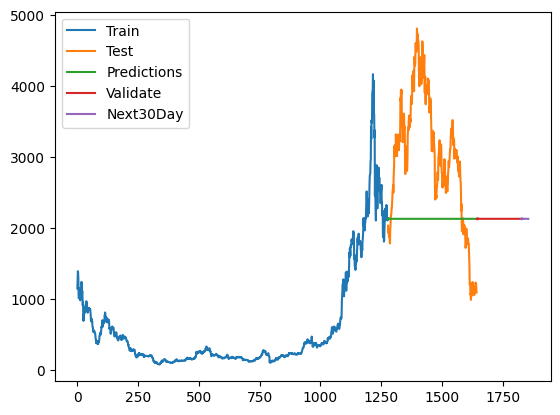

In [33]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [34]:
test_data.index

RangeIndex(start=1278, stop=1643, step=1)

In [35]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val) ** 2))
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
valid_mape = calculate_mape(y_val, y_pred_val)
test_mape = calculate_mape(y_test, y_pred)
valid_mda = calculate_mda(y_val, y_pred_val)
test_mda = calculate_mda(y_test, y_pred)

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
print('Validation MDA:', valid_mda)
print('Testing MDA:', test_mda)

Validation RMSE: 747.5912965825693
Testing RMSE: 1257.2019837815394
Validation MAPE: 53.80784085988007
Testing MAPE: 35.75663611170663
Validation MDA: 39.89071038251366
Testing MDA: 19.78021978021978
